<a href="https://www.kaggle.com/code/alihassanshahid/car-price-prediction?scriptVersionId=207108623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color:#3a8eae; border: 2px solid #007acc; border-radius:10px; padding:20px;">
    <h2 style="color:#ffffff; font-family: Arial, sans-serif;">🚗 Car Price Prediction</h2>
    <p style="color:#e0e0e0; font-size:16px;">
        This notebook aims to predict the prices of used cars based on various features like mileage, engine size, brand, and year. 
        We will use machine learning models like <strong style="color:#ff6f61;">Linear Regression</strong>, <strong style="color:#6fa3ef;">Decision Trees</strong>, 
        and <strong style="color:#6fe69e;">Gradient Boosting</strong> to achieve this.
    </p>
    <ul style="color:#ffffff; font-size:15px; list-style-type: disc; margin-left: 20px;">
        <li style="color:#ff6f61;">🔍 Data Cleaning & Preprocessing</li>
        <li style="color:#6fa3ef;">📊 Model Training & Evaluation</li>
        <li style="color:#6fe69e;">📈 Model Comparison</li>
    </ul>
</div>


## Metadata Information 🗂️

| Feature              | Description |
|----------------------|-------------|
| Make/Model           | The brand or model of the car |
| Year                 | The year the car was manufactured |
| Engine Size (L)      | Size of the car's engine in liters |
| Fuel Type            | Type of fuel used (e.g., Petrol, Diesel, etc.) |
| Transmission         | Type of transmission (e.g., Automatic, Manual) |
| Mileage (km)         | Distance covered by the car in kilometers |
| Price                | Target variable representing the price of the car |

---

**Data Source**: [Provide source or mention if proprietary]  
**Data Collection Context**: Provide context, such as car listings, second-hand market, etc.


## Model Development Steps 🛠️

### Step 1: Data Preprocessing
- Handle missing values (impute with mean/median or drop).
- Encode categorical features (using one-hot encoding or label encoding).
- Scale numerical features using techniques like MinMaxScaler or StandardScaler.

### Step 2: Exploratory Data Analysis (EDA)
- Visualize data distributions and feature relationships (e.g., scatter plots for features vs. price).
- Check for multicollinearity (using correlation matrices).

### Step 3: Feature Engineering
- Consider creating new features (e.g., `Car Age` derived from `Year`).
- Drop or transform features based on correlations and feature importance.

### Step 4: Model Selection & Training
- Split the data into training and testing sets (e.g., 80/20).
- Train a baseline model (e.g., Linear Regression).
- Experiment with other models:
  - Random Forest
  - Gradient Boosting (e.g., XGBoost, LightGBM)
  - Support Vector Regression (SVR)
- Use cross-validation to evaluate performance consistently.

### Step 5: Hyperparameter Tuning
- Use techniques like GridSearchCV or RandomizedSearchCV for optimal hyperparameters.

### Step 6: Model Evaluation
- Evaluate models using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.
- Compare results and select the model with the best performance.

### Step 7: Further Optimization (Optional)
- Try feature selection techniques (e.g., recursive feature elimination).
- Address overfitting by using regularization methods (Lasso, Ridge) or ensemble methods.

---



| Model | Model | Model |
|-------|-------|-------|
| 🏎️ **RandomForest** | 🏎️ **AdaBoost** | 🏎️ **GradientBoosting** |
| 🏎️ **KNeighbors** | 🏎️ **SVR** | 🏎️ **DecisionTree** |
| 🏎️ **XGBoost** | 🏎️ **CatBoost** | 🏎️ **LGBM** |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df = df.drop(['ID', 'Levy', 'Leather interior', 'Gear box type', 'Doors', 'Wheel'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          19237 non-null  int64  
 1   Manufacturer   19237 non-null  object 
 2   Model          19237 non-null  object 
 3   Prod. year     19237 non-null  int64  
 4   Category       19237 non-null  object 
 5   Fuel type      19237 non-null  object 
 6   Engine volume  19237 non-null  object 
 7   Mileage        19237 non-null  object 
 8   Cylinders      19237 non-null  float64
 9   Drive wheels   19237 non-null  object 
 10  Color          19237 non-null  object 
 11  Airbags        19237 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


# 📊 **Visualizations**
This section presents various visualizations to help analyze the used car prices.

In [6]:
import plotly.graph_objects as go
labels = ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'Hatchback', 'Jeep']
source = [0, 1, 2, 3, 4, 4, 0]  # Manufacturer to category
target = [4, 4, 5, 4, 5, 5, 5]
value = [1, 1, 1, 1, 1, 1, 1]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
        color='blue'
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Sankey Diagram of Manufacturer to Category Relationships", font_size=10)
fig.show()


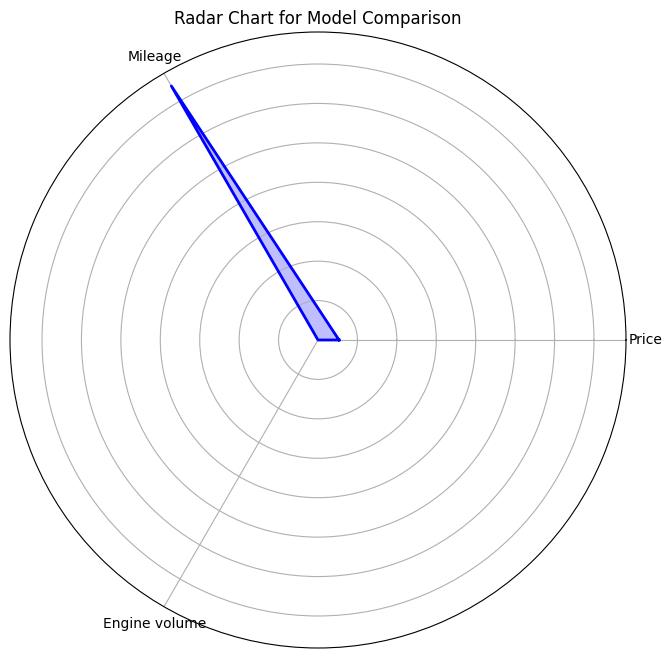

In [7]:
import numpy as np

# Sample data with averages for each model
labels = np.array(['Price', 'Mileage', 'Engine volume'])
values = np.array([13328, 186005, 3.5])
num_vars = len(labels)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = np.concatenate((values,[values[0]]))
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart for Model Comparison')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



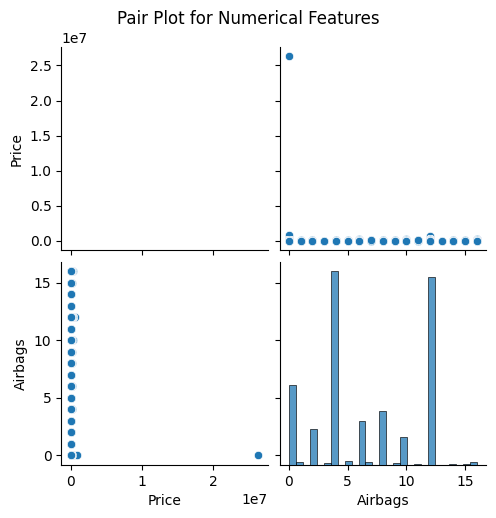

In [8]:
# Include only numerical columns for pair plot
numerical_df = df[['Price', 'Mileage', 'Engine volume', 'Airbags']]

sns.pairplot(numerical_df)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


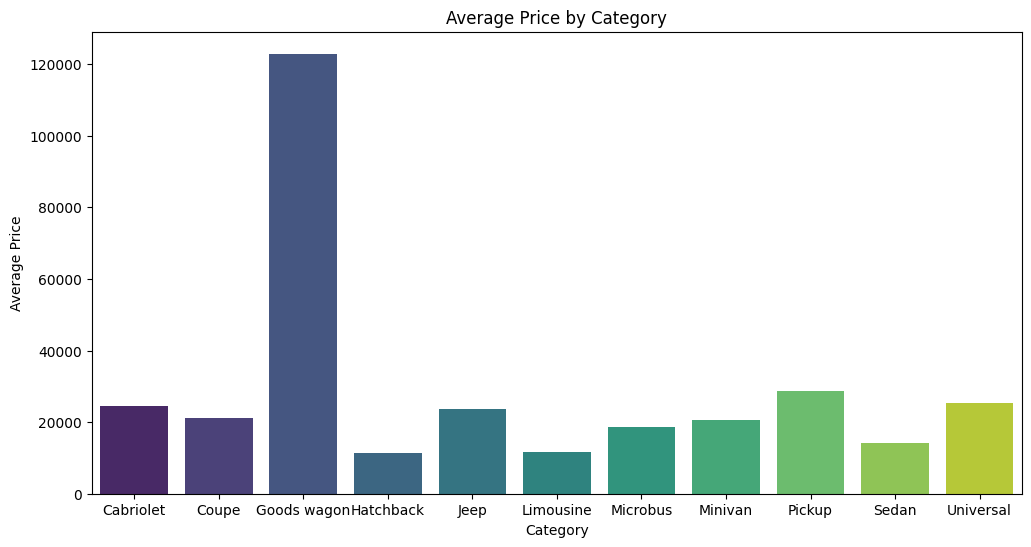

In [9]:
avg_price = df.groupby('Category')['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price, x='Category', y='Price', palette='viridis')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


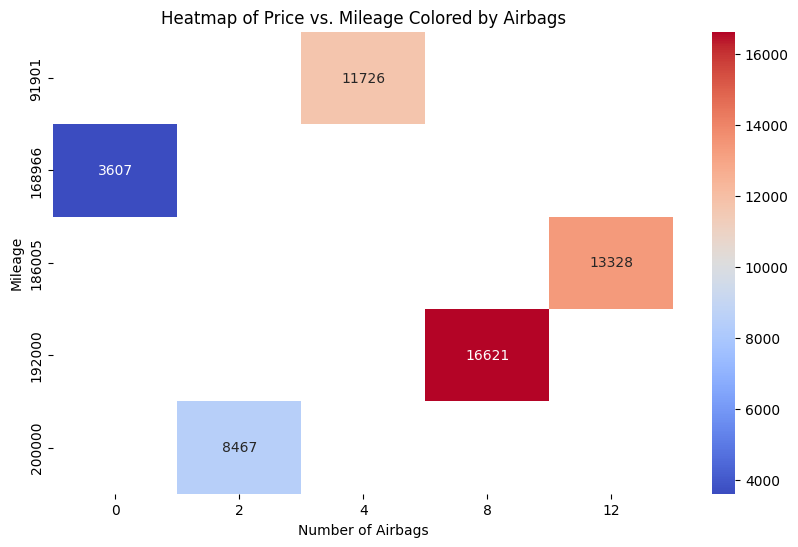

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Airbags': [12, 8, 2, 0, 4]
}

df = pd.DataFrame(data)

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(values='Price', index='Mileage', columns='Airbags', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Heatmap of Price vs. Mileage Colored by Airbags')
plt.xlabel('Number of Airbags')
plt.ylabel('Mileage')
plt.show()


In [11]:
import plotly.express as px

# Sample data with additional columns
data = {
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    'Drive wheels': ['4x4', '4x4', 'Front', '4x4', 'Front'],
    'Count': [1, 1, 2, 1, 1]
}

df = pd.DataFrame(data)

# Create a chord diagram
fig = px.sunburst(df, path=['Manufacturer', 'Drive wheels'], values='Count', title='Chord Diagram for Drive Wheels vs. Manufacturer')
fig.show()


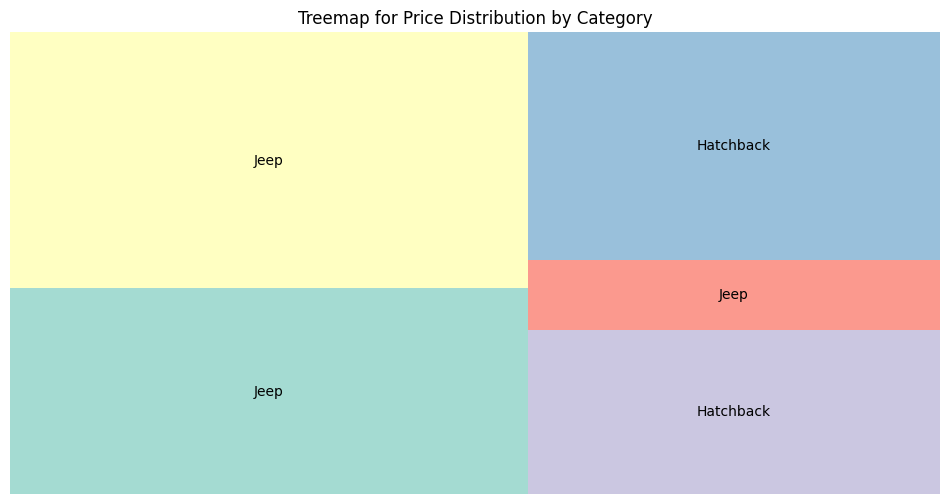

In [12]:
import squarify

# Sample data with additional columns
data = {
    'Category': ['Jeep', 'Jeep', 'Hatchback', 'Jeep', 'Hatchback'],
    'Price': [13328, 16621, 8467, 3607, 11726]
}

df = pd.DataFrame(data)

# Create a treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=df['Price'], label=df['Category'], alpha=0.8, color=sns.color_palette('Set3', len(df)))
plt.title('Treemap for Price Distribution by Category')
plt.axis('off')
plt.show()


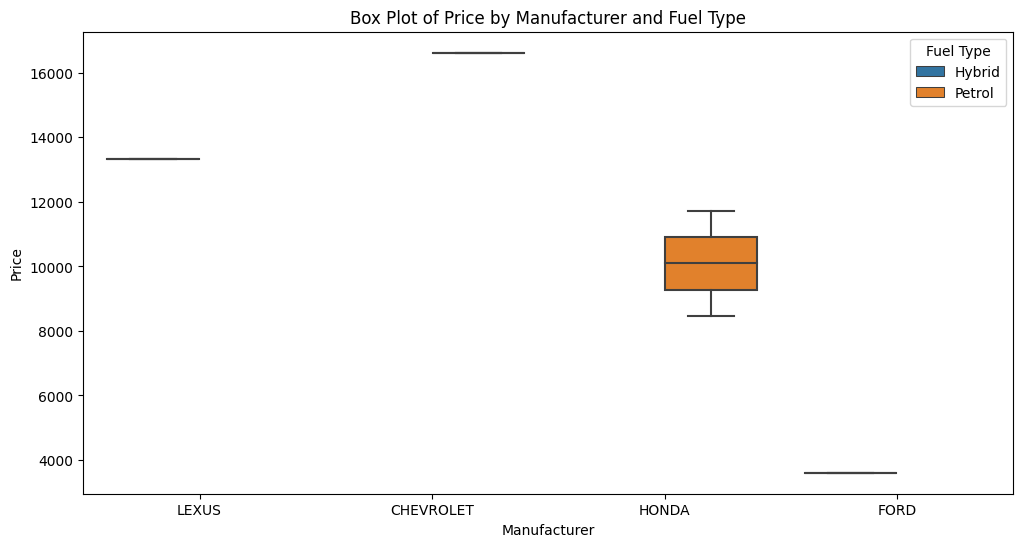

In [13]:
# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    'Fuel type': ['Hybrid', 'Petrol', 'Petrol', 'Hybrid', 'Petrol']
}

df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Manufacturer', y='Price', hue='Fuel type')
plt.title('Box Plot of Price by Manufacturer and Fuel Type')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


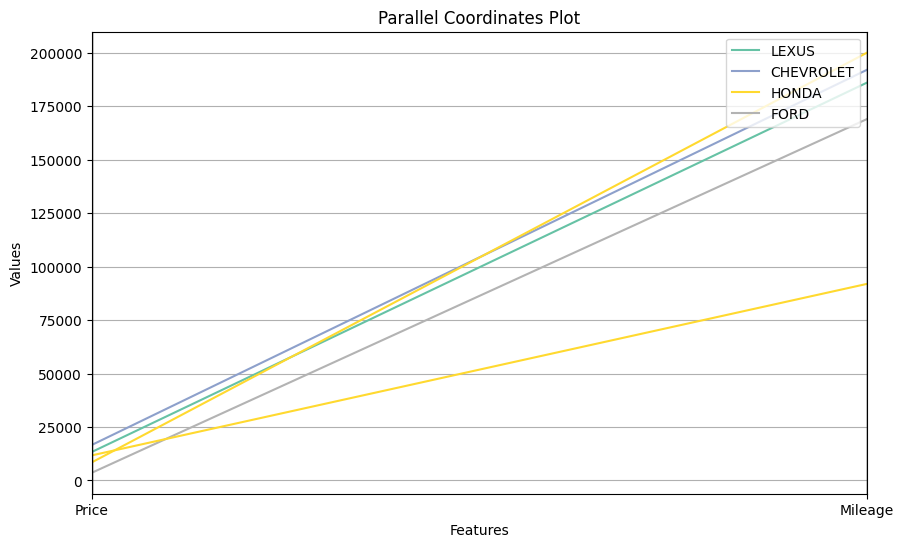

In [14]:
from pandas.plotting import parallel_coordinates

# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Manufacturer': ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA']
}

df = pd.DataFrame(data)

# Create a parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df, 'Manufacturer', colormap='Set2')
plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


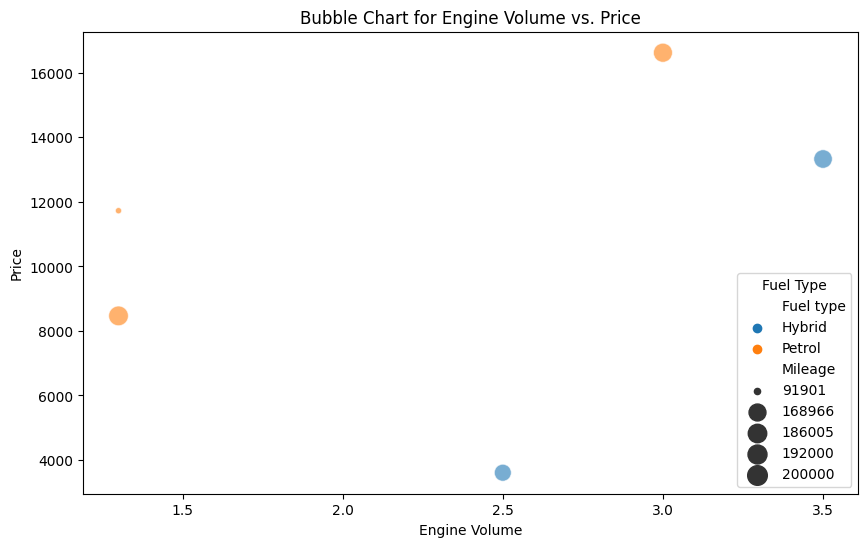

In [15]:
# Sample data with additional columns
data = {
    'Price': [13328, 16621, 8467, 3607, 11726],
    'Engine volume': [3.5, 3.0, 1.3, 2.5, 1.3],
    'Mileage': [186005, 192000, 200000, 168966, 91901],
    'Fuel type': ['Hybrid', 'Petrol', 'Petrol', 'Hybrid', 'Petrol']
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Engine volume', y='Price', size='Mileage', sizes=(20, 200), hue='Fuel type', alpha=0.6)
plt.title('Bubble Chart for Engine Volume vs. Price')
plt.xlabel('Engine Volume')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()


# 🔧 **Data Cleaning**
This section outlines the steps taken to clean the dataset for used car price prediction. We will handle data type conversions, outlier removal, and missing values.


In [16]:
# Convert 'Mileage' column to string and replace ' km' with an empty string, then convert back to numeric
df['Mileage'] = pd.to_numeric(df['Mileage'].astype(str).str.replace(' km', ''), errors='coerce')

# Convert 'Engine volume' and 'Price' columns to numeric with coercion for non-numeric values
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = ['Price', 'Mileage', 'Engine volume']

for column in numeric_columns:
    df = remove_outliers(df, column)

print(df.describe())
import pandas as pd

              Price  Engine volume        Mileage
count      4.000000       4.000000       4.000000
mean   10505.750000       2.575000  186742.750000
std     5689.482424       0.942956   13164.984754
min     3607.000000       1.300000  168966.000000
25%     7252.000000       2.200000  181745.250000
50%    10897.500000       2.750000  189002.500000
75%    14151.250000       3.125000  194000.000000
max    16621.000000       3.500000  200000.000000


In [17]:
df.isnull().sum()

Price            0
Engine volume    0
Mileage          0
Fuel type        0
dtype: int64

# 🛠️ **Models**
In this section, we will explore the various machine learning models used to predict car prices. Each model offers unique strengths and will be evaluated for performance.

In [18]:
df.head()

,Price,Engine volume,Mileage,Fuel type
0,13328,3.5,186005,Hybrid
1,16621,3.0,192000,Petrol
2,8467,1.3,200000,Petrol
3,3607,2.5,168966,Hybrid


In [19]:
"""from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying categorical and numerical columns
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(exclude='object').drop('Price', axis=1).columns

# Define preprocessing for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ]
)

# Define different models
models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=50),
    # 'KNeighbors': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=1000, gamma=0.1, epsilon=.1),
    'DecisionTree': DecisionTreeRegressor(random_state=50),
    'XGBoost': XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=50),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, loss_function='RMSE', random_seed=50, verbose=False),
    'LGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.05, random_state=50)
}

# Splitting the data into training and testing sets
drop_columns = ['Price']
X = df.drop(columns=[col for col in drop_columns if col in df.columns])
# X = df.drop(['Price','ID','Levy','Leather interior','Gear box type','Doors'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test) """

"from sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler, OneHotEncoder\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\nfrom sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.svm import SVR\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom xgboost import XGBRegressor\nfrom catboost import CatBoostRegressor\nfrom lightgbm import LGBMRegressor\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Identifying categorical and numerical columns\ncategorical_columns = df.select_dtypes('object').columns\nnumerical_columns = df.select_dtypes(exclude='object').drop('Price', axis=1).columns\n\n# Define preprocessing for numerical and categorical columns\

In [20]:
""" import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Store model results
model_performance = []

# Train and evaluate each model
for name, model in models.items():
    # Define the pipeline for each model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Save results
    model_performance.append({
        'Model': name,
        'R2 Score': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Predictions': y_pred  # Save predictions for later visualization
    })

# Convert results to DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance)

# Display performance of all models
print("\nModel Performance Comparison:")
print(performance_df)

# Create a combined plot of actual vs predicted prices for all models
num_models = len(model_performance)
ncols = 3  # Number of columns in the subplot
nrows = (num_models + ncols - 1) // ncols  # Calculate number of rows needed

plt.figure(figsize=(18, nrows * 5))  # Adjust figure size for better readability

for idx, model_info in enumerate(model_performance):
    plt.subplot(nrows, ncols, idx + 1)
    sns.scatterplot(x=y_test, y=model_info['Predictions'], color='#f7e227')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f"{model_info['Model']} - R²: {model_info['R2 Score']:.2f}", fontsize=12)
    plt.xlabel('Actual Price', fontsize=10)
    plt.ylabel('Predicted Price', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()
"""

' import warnings\nimport matplotlib.pyplot as plt\n\nwarnings.filterwarnings("ignore")\n\n# Store model results\nmodel_performance = []\n\n# Train and evaluate each model\nfor name, model in models.items():\n    # Define the pipeline for each model\n    pipeline = Pipeline(steps=[\n        (\'preprocessor\', preprocessor),\n        (\'model\', model)\n    ])\n    \n    # Fit the model\n    pipeline.fit(X_train, y_train)\n    \n    # Predict on the test set\n    y_pred = pipeline.predict(X_test)\n    \n    # Evaluation metrics\n    r2 = r2_score(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    mse = mean_squared_error(y_test, y_pred)\n    \n    # Save results\n    model_performance.append({\n        \'Model\': name,\n        \'R2 Score\': r2,\n        \'Mean Absolute Error\': mae,\n        \'Mean Squared Error\': mse,\n        \'Predictions\': y_pred  # Save predictions for later visualization\n    })\n\n# Convert results to DataFrame for easy comparison\nperformance